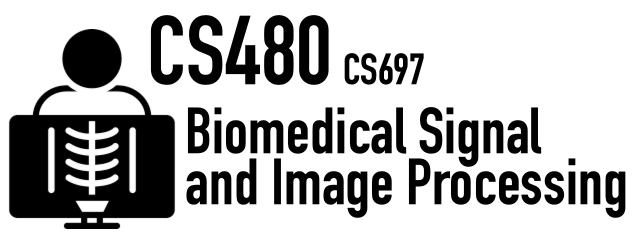
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [21]:
# load numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# we are using mahotas again, so lets install it!
!pip install mahotas
!pip install Pillow

In [22]:
# our imports include sklearn this time
import mahotas as mh
import os
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Task 1:** Download, extract, and load the data! [15 Points]

In [4]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [23]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [24]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

In [25]:
print(img.shape)

(1858, 2090)


In [26]:
pic = Image.open(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [27]:
print(pic.format)
print(pic.mode)
print(pic.size)
pic.show()

JPEG
L
(2090, 1858)


**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) The first operation is collecting the normal images,
# TODO: Operation 2) The second operation is collecting the pneumonia images, 

In [54]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )
normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  print(loaded_image)
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

# print(normal_images[:2])

]
 [ 2.96868294e-078 -2.76357394e-075 -6.22577937e-072 ...  3.53737464e-073
   1.48542099e-075  0.00000000e+000]
 ...
 [-2.21591487e-126  1.13454841e-123  4.64711030e-120 ...  4.74989271e-077
   1.25188601e-080  0.00000000e+000]
 [ 5.90910632e-126 -1.51273122e-123  0.00000000e+000 ...  3.61639558e-077
   2.00301761e-080  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]]
[[ 7.30000000e+001  7.90000000e+001  7.60000000e+001 ...  6.30000000e+001
   7.30000000e+001  7.10000000e+001]
 [ 7.30000000e+001  7.70000000e+001  7.30000000e+001 ...  7.10000000e+001
   6.90000000e+001  6.70000000e+001]
 [ 7.30000000e+001  7.10000000e+001  7.30000000e+001 ...  7.10000000e+001
   7.00000000e+001  6.70000000e+001]
 ...
 [-2.76357394e-076 -1.98092980e-072 -5.79563461e-069 ...  8.94444804e-128
   3.38121776e-131  3.30197046e-134]
 [-1.03634023e-076 -4.95232450e-073 -1.30401779e-069 ...  8.00672365e-127
   2.16257052e-130  3.687

In [53]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )
pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  print(loaded_image)
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

..   0.   0.   0.]]
[[ 1.60000000e+01  1.60000000e+01  1.50000000e+01 ...  5.00000000e+00
   2.60208521e-17  0.00000000e+00]
 [ 1.50000000e+01  1.50000000e+01  1.40000000e+01 ...  1.40000000e+01
  -5.55111512e-16  0.00000000e+00]
 [ 1.40000000e+01  1.40000000e+01  1.30000000e+01 ...  2.20000000e+01
   1.30000000e+01  0.00000000e+00]
 ...
 [ 2.50000000e+01  2.50000000e+01  2.50000000e+01 ...  2.40000000e+01
   2.40000000e+01  0.00000000e+00]
 [ 2.50000000e+01  2.50000000e+01  2.50000000e+01 ...  2.40000000e+01
   2.40000000e+01  0.00000000e+00]
 [ 2.50000000e+01  2.50000000e+01  2.50000000e+01 ...  2.40000000e+01
   2.40000000e+01  0.00000000e+00]]
[[ 2.90000000e+01  3.20000000e+01  3.50000000e+01 ...  1.92000000e+02
   1.96000000e+02  0.00000000e+00]
 [ 3.10000000e+01  3.50000000e+01  3.70000000e+01 ...  1.88000000e+02
   1.89000000e+02  0.00000000e+00]
 [ 3.20000000e+01  3.50000000e+01  3.80000000e+01 ...  1.87000000e+02
   1.86000000e+02  0.00000000e+00]
 ...
 [-4.32986980e-14 -5.953

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
# TODO: YOUR CODE

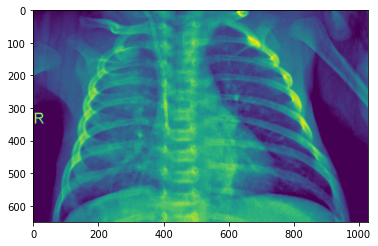

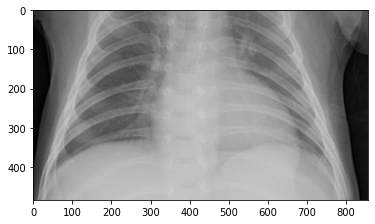

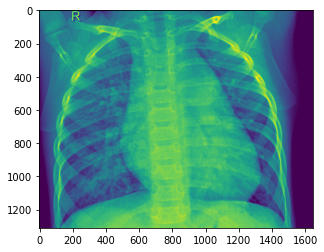

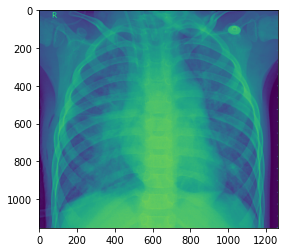

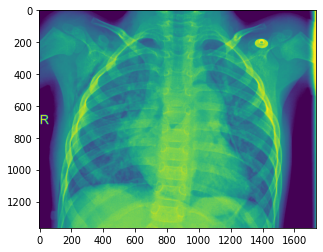

In [30]:
def visualizePneumonia(filename: str=None) -> None:
    # View multiple images stored in files, stacking vertically
    # Arguments: str - path to filename containing image
    pics = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(pics)
for file in pneumonia_files[:5]:
    file_imagings = PNEUMONIA_DIR + file
    visualizePneumonia(file_imagings)

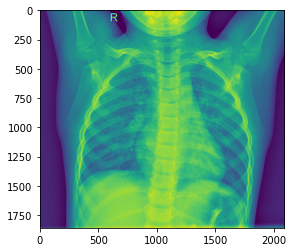

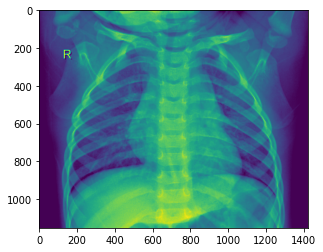

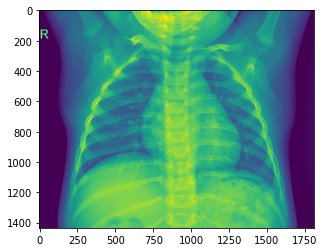

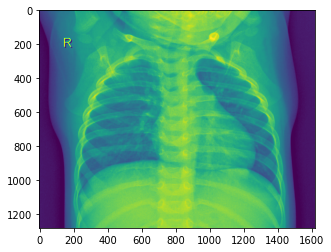

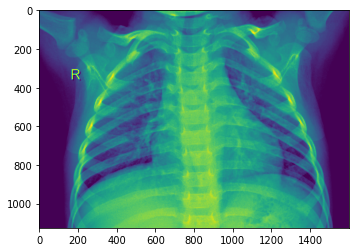

In [31]:
def visualizeNormal(filename: str=None) -> None:
    # View multiple images stored in files, stacking vertically
    # Arguments: str - path to filename containing image
    pics = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(pics)
for file in normal_files[:5]:
    file_imagings = NORMAL_DIR + file
    visualizeNormal(file_imagings)

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [32]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()
# print(training_data)

In [33]:
# TODO: Please create the training_target vector with
# 0 for a normal image, and
# 1 for a pneumonia.
training_target = []
for count in range(TRAINING_COUNT):
    count = 0
    training_target += [count]
for count in range(TRAINING_COUNT):
    count = 1
    training_target += [count]

print(training_target)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [34]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [35]:
# TODO: Please create the testing_target vector 
# with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = []

for count in range(TESTING_COUNT):
    count = 0
    testing_target += [count]
for count in range(TESTING_COUNT):
    count = 1
    testing_target += [count]

print(testing_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [36]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms. Random Forest classifiers can directly classify instances into multiple classes and can limit this instability by averaging predictions over many trees. The Random Forest algorithm introduces extra randomness when growing trees instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features.


In [40]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
print(f"Classification accuracy: {np.mean(clf.score( testing_data, testing_target )) *100:.2f}%")

Classification accuracy: 92.50%


In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised

I don't believe the approximation (92.5%) is the good one. I think to consider the good classification is around 90% or less.

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [39]:
# To evaluate the model, need to make prediction first.
predictions = clf.predict(testing_data)
print(predictions)

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1]


In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

Some methods to improve the classification performance:
1) try different amount of n_estimators
2) Tuning the hyperameter or random forest to using the KNN in the Scikit library
3) Feature importance
4) Matrix confusion

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw